In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
import cv2
import imageio
sys.path.append("../pypom")
import camera
import utils

np.set_printoptions(suppress=True)

Extrinsics kept in 'cm'.
[[556.93075901 341.90338929]
 [264.08041957 278.83213721]]


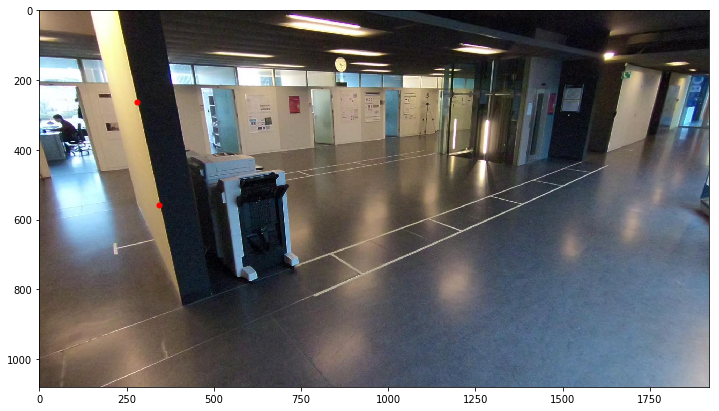

In [2]:
cam0 = camera.CameraKRt.from_json("intrinsics_cam0.json", "extrinsics_cam0.json", (1080, 1920), "cm")
world_points = np.array([[0,0,  0], # this is feet position in 'cm'
                         [0,0,180]])# this is head position in 'cm'

proj = cam0.project_points(world_points)
print(proj)

img = imageio.imread("frame_cam0_undistorted.JPG")

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.plot(proj[:,1], proj[:,0], 'r.', markersize=10)

Extrinsics converted from 'cm' to 'm'.
[[556.93075901 341.90338929]
 [264.08041957 278.83213721]]


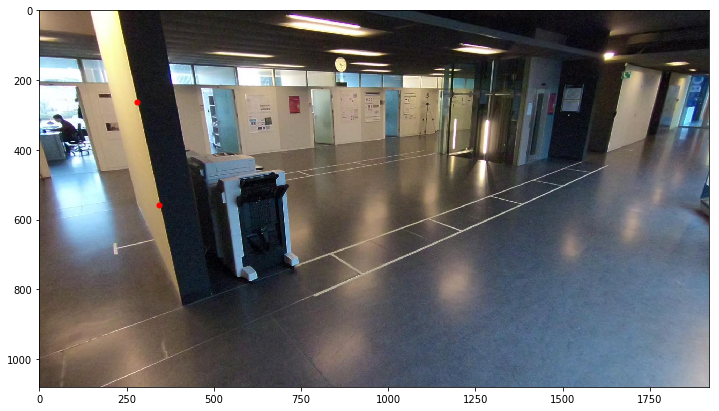

In [3]:
cam0 = camera.CameraKRt.from_json("intrinsics_cam0.json", "extrinsics_cam0.json", (1080, 1920), "m")
world_points = np.array([[0,0,  0], # this is feet position in 'm'
                         [0,0,1.8]])# this is head position in 'm'

proj = cam0.project_points(world_points)
print(proj)

img = imageio.imread("frame_cam0_undistorted.JPG")

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.plot(proj[:,1], proj[:,0], 'r.', markersize=10)

Extrinsics converted from 'cm' to 'ft'.
[[556.93075901 341.90338929]
 [264.08052882 278.83216073]]


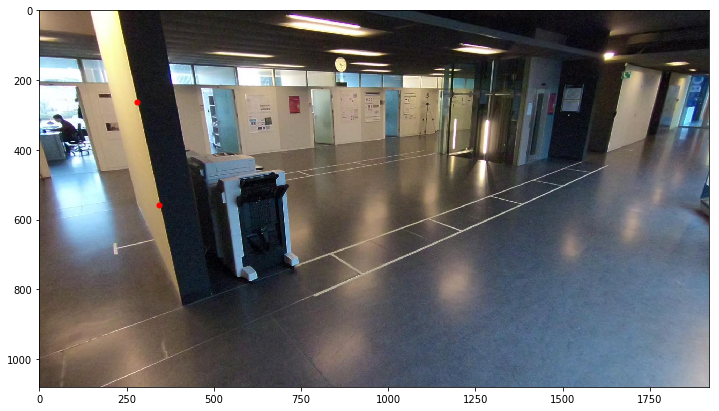

In [4]:
cam0 = camera.CameraKRt.from_json("intrinsics_cam0.json", "extrinsics_cam0.json", (1080, 1920), "ft")
world_points = np.array([[0,0,  0], # this is feet position in 'feet'
                         [0,0,5.90551]])# this is head position in 'feet'

proj = cam0.project_points(world_points)
print(proj)

img = imageio.imread("frame_cam0_undistorted.JPG")

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.plot(proj[:,1], proj[:,0], 'r.', markersize=10)

Extrinsics converted from 'cm' to 'ft'.
[[92.82179317 56.98389822]
 [44.01342147 46.47202679]]


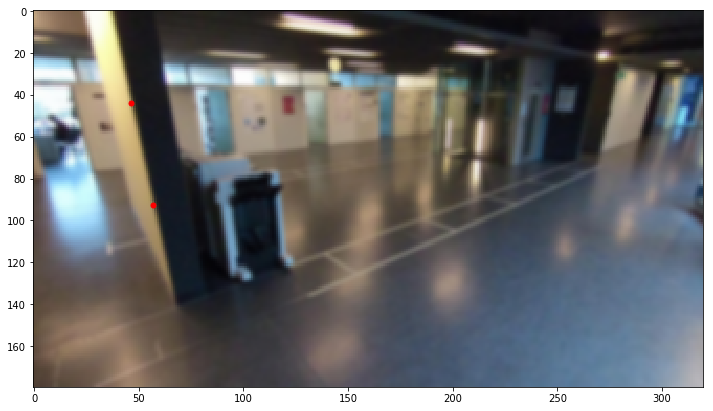

In [5]:
view_shape = (1080//6, 1920//6)
cam0 = camera.CameraKRt.from_json("intrinsics_cam0.json", "extrinsics_cam0.json", view_shape, "ft")
world_points = np.array([[0,0,  0], # this is feet position in 'feet'
                         [0,0,5.90551]])# this is head position in 'feet'

proj = cam0.project_points(world_points)
print(proj)

img = utils.downsample_image(imageio.imread("frame_cam0_undistorted.JPG"), view_shape)

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.plot(proj[:,1], proj[:,0], 'r.', markersize=10)

[[92.1654772  54.84064089]
 [44.0134032  46.47202647]]


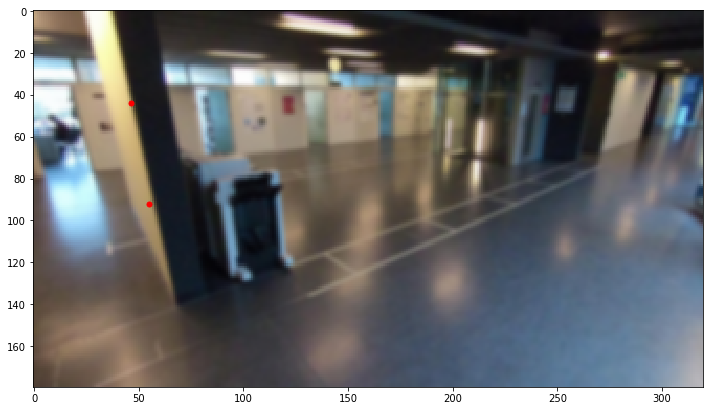

In [6]:
view_shape = (1080//6, 1920//6)
cam0 = camera.CameraHbotHtop.from_json("homographies_bottom_top.json", view_shape, "ft")
world_points = np.array([[0,0,  0], # this is feet position in 'feet'
                         [0,0,5.90551]])# this is head position in 'feet'

proj = np.vstack([cam0.project_bottom_points(world_points[[0]]),
                  cam0.project_top_points(world_points[[1]])])
print(proj)

img = utils.downsample_image(imageio.imread("frame_cam0_undistorted.JPG"), view_shape)

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.plot(proj[:,1], proj[:,0], 'r.', markersize=10)

[[184.3309544  109.68128178]
 [ 88.02680639  92.94405294]]


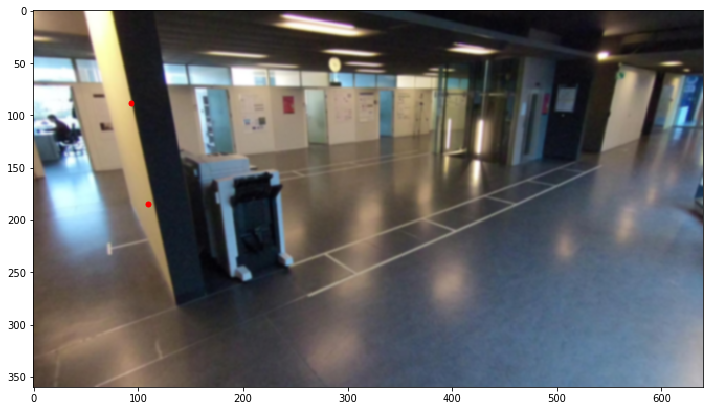

In [2]:
view_shape = (1080//3, 1920//3)
cam0 = camera.CameraHbotHtop.from_json("homographies_bottom_top.json", view_shape, "m", invert=False)
world_points = np.array([[0,0,  0], # this is feet position in 'm'
                         [0,0,1.8]])# this is head position in 'm'

proj = np.vstack([cam0.project_bottom_points(world_points[[0]]),
                  cam0.project_top_points(world_points[[1]])])
print(proj)

img = utils.downsample_image(imageio.imread("frame_cam0_undistorted.JPG"), view_shape)

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.plot(proj[:,1], proj[:,0], 'r.', markersize=10)

[[184.3309544  109.68128178]
 [ 92.         109.68128178]]


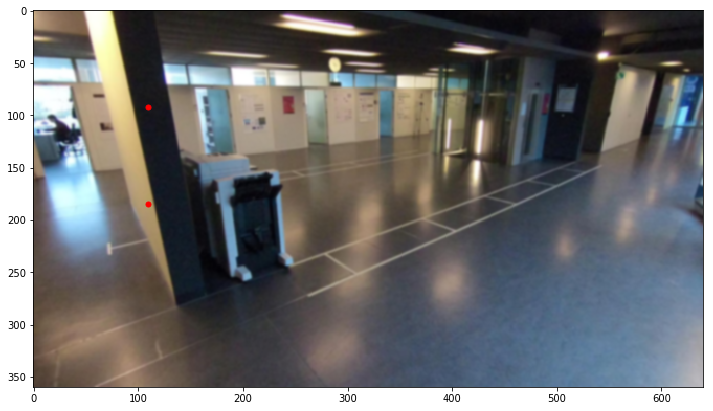

In [2]:
view_shape = (1080//3, 1920//3)
cam0 = camera.CameraHbotHeight.from_json("homographies_bottom_head_height.json", view_shape, "m")
world_points = np.array([[0,0,  0], # this is feet position in 'm'
                         [0,0,1.8]])# this is head position in 'm'

proj = np.vstack([cam0.project_bottom_points(world_points[[0]]),
                  cam0.project_top_points(world_points[[1]])])
print(proj)

img = utils.downsample_image(imageio.imread("frame_cam0_undistorted.JPG"), view_shape)

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.plot(proj[:,1], proj[:,0], 'r.', markersize=10)

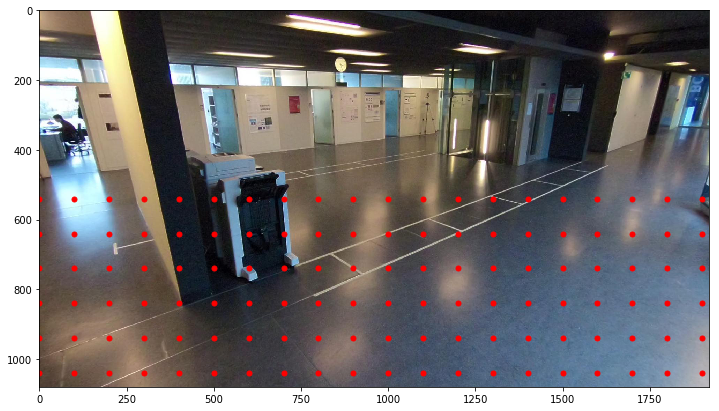

In [18]:
grid = np.meshgrid(np.arange(1080//2,1080, 100), np.arange(0,1920, 100))
grid = np.vstack([grid[0].ravel(), grid[1].ravel()]).T

img = imageio.imread("frame_cam0_undistorted.JPG")

cam0 = camera.CameraHbotHeight.from_json("homographies_bottom_head_height.json", (1080,1920), "m", invert=True)
proj = cam0.project_bottom_points(grid)

plt.figure(figsize=(12,12))
plt.plot(grid[:,1], grid[:,0], 'r.', markersize=10)
plt.plot(proj[:,1], proj[:,0], 'g.', markersize=10)
plt.imshow(img)

In [ ]:
cam0.project_bottom_points(np.array([]))

In [19]:
proj

array([[    6.30854305, -1708.4743404 ],
       [    6.87118398, -1708.00994439],
       [    7.43384337, -1707.54553314],
       [    7.99652122, -1707.08110665],
       [    8.55921753, -1706.61666492],
       [    9.12193231, -1706.15220796],
       [    5.99153246, -1712.42433907],
       [    6.55639522, -1711.95816994],
       [    7.12127659, -1711.49198546],
       [    7.68617657, -1711.02578561],
       [    8.25109515, -1710.55957041],
       [    8.81603235, -1710.09333984],
       [    5.67200235, -1716.4057314 ],
       [    6.23910456, -1715.93777557],
       [    6.80622552, -1715.46980427],
       [    7.37336525, -1715.00181749],
       [    7.94052373, -1714.53381523],
       [    8.50770097, -1714.0657975 ],
       [    5.34992255, -1720.41889313],
       [    5.91928204, -1719.94913688],
       [    6.48866043, -1719.47936503],
       [    7.05805774, -1719.00957759],
       [    7.62747395, -1718.53977454],
       [    8.19690906, -1718.06995589],
       [    5.02